In [2]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import gpxpy
import haversine
import json

# Read the config JSON file

In [3]:
with open("config.json", "r") as config_file:
    config = json.load(config_file)

# Read data from the CSV file

In [4]:
df = pd.read_csv("race_results.csv", 
                 parse_dates=["date"], 
                 date_format="%Y-%m-%d")

In [5]:
df

,name,distance,date,city,country,duration,gpxfilename
0,Cursa Moritz Sant Antoni,5,2025-01-26,Barcelona,Spain,0:29:19,Cursa_Moritz_Sant_Antoni_5km_2025.gpx
1,XIII Cursa Benefica Malalties Minoritaries,5,2025-02-23,Badalona,Spain,0:27:10,Cursa_Benèfica_Malalties_Minoritàries_Badalona...
2,Cursa de la Dona Pienda,5,2025-03-23,Pineda de Mar,Spain,0:25:36,Cursa_de_la_Dona_Pineda_de_Mar_5_Km.gpx
3,15a Cursa Nocturna de L'Hospitalet,5,2025-04-05,L'Hospitalet de Llobregat,Spain,0:25:40,Cursa_Nocturna_de_L_Hospitalet_5_Km.gpx
4,Cursa Montilivi Girona,5,2025-04-27,Girona,Spain,0:28:49,Cursa_Montilivi_Girona_5_Km.gpx
5,La Cursa de RAC1 Port de Barcelona,6,2025-05-18,Barcelona,Spain,0:30:04,Cursa_de_RAC1_Port_de_Barcelona_6Km.gpx
6,14a Cursa Popular Illa Carlemany,5,2025-06-01,Andorra la Vella,Andorra,0:25:12,Cursa_Popular_Illa_Carlemany_Andorra_5_Km.gpx


In [6]:
df.dtypes

name                   object
distance                int64
date           datetime64[ns]
city                   object
country                object
duration               object
gpxfilename            object
dtype: object

# Add column with date as string

In [7]:
df["date_str"] = df.apply(lambda row: row["date"].strftime("%b %d, %Y"), axis=1)

# Add columns with total duration converted into timedelta and seconds

In [8]:
def from_str_to_timedelta(row):
    duration = datetime.strptime(row["duration_total_timedelta"], "%H:%M:%S")
    duration = timedelta(hours=duration.hour,
                         minutes=duration.minute,
                         seconds=duration.second)
    return duration

In [9]:
df = df.rename(columns={"duration": "duration_total_timedelta"})
df["duration_total_timedelta"] = df.apply(from_str_to_timedelta, axis=1)

df["duration_total_sec"] = df.apply(lambda row: row["duration_total_timedelta"].seconds, axis=1)

In [10]:
df

,name,distance,date,city,country,duration_total_timedelta,gpxfilename,date_str,duration_total_sec
0,Cursa Moritz Sant Antoni,5,2025-01-26,Barcelona,Spain,0 days 00:29:19,Cursa_Moritz_Sant_Antoni_5km_2025.gpx,"Jan 26, 2025",1759
1,XIII Cursa Benefica Malalties Minoritaries,5,2025-02-23,Badalona,Spain,0 days 00:27:10,Cursa_Benèfica_Malalties_Minoritàries_Badalona...,"Feb 23, 2025",1630
2,Cursa de la Dona Pienda,5,2025-03-23,Pineda de Mar,Spain,0 days 00:25:36,Cursa_de_la_Dona_Pineda_de_Mar_5_Km.gpx,"Mar 23, 2025",1536
3,15a Cursa Nocturna de L'Hospitalet,5,2025-04-05,L'Hospitalet de Llobregat,Spain,0 days 00:25:40,Cursa_Nocturna_de_L_Hospitalet_5_Km.gpx,"Apr 05, 2025",1540
4,Cursa Montilivi Girona,5,2025-04-27,Girona,Spain,0 days 00:28:49,Cursa_Montilivi_Girona_5_Km.gpx,"Apr 27, 2025",1729
5,La Cursa de RAC1 Port de Barcelona,6,2025-05-18,Barcelona,Spain,0 days 00:30:04,Cursa_de_RAC1_Port_de_Barcelona_6Km.gpx,"May 18, 2025",1804
6,14a Cursa Popular Illa Carlemany,5,2025-06-01,Andorra la Vella,Andorra,0 days 00:25:12,Cursa_Popular_Illa_Carlemany_Andorra_5_Km.gpx,"Jun 01, 2025",1512


# Add columns with duration per km converted into timedelta, timedelta as string and seconds

In [11]:
df["duration_km_timedelta"] = df["duration_total_timedelta"] / df["distance"]

df["duration_km_timedelta_str"] = df.apply(lambda row: datetime.strftime(datetime(2025, 1, 1) +
                                                                         row["duration_km_timedelta"], "%H:%M:%S"),
                                           axis=1)

df["duration_km_sec"] = df["duration_total_sec"] / df["distance"]

In [12]:
df

,name,distance,date,city,country,duration_total_timedelta,gpxfilename,date_str,duration_total_sec,duration_km_timedelta,duration_km_timedelta_str,duration_km_sec
0,Cursa Moritz Sant Antoni,5,2025-01-26,Barcelona,Spain,0 days 00:29:19,Cursa_Moritz_Sant_Antoni_5km_2025.gpx,"Jan 26, 2025",1759,0 days 00:05:51.800000,00:05:51,351.800000
1,XIII Cursa Benefica Malalties Minoritaries,5,2025-02-23,Badalona,Spain,0 days 00:27:10,Cursa_Benèfica_Malalties_Minoritàries_Badalona...,"Feb 23, 2025",1630,0 days 00:05:26,00:05:26,326.000000
2,Cursa de la Dona Pienda,5,2025-03-23,Pineda de Mar,Spain,0 days 00:25:36,Cursa_de_la_Dona_Pineda_de_Mar_5_Km.gpx,"Mar 23, 2025",1536,0 days 00:05:07.200000,00:05:07,307.200000
3,15a Cursa Nocturna de L'Hospitalet,5,2025-04-05,L'Hospitalet de Llobregat,Spain,0 days 00:25:40,Cursa_Nocturna_de_L_Hospitalet_5_Km.gpx,"Apr 05, 2025",1540,0 days 00:05:08,00:05:08,308.000000
4,Cursa Montilivi Girona,5,2025-04-27,Girona,Spain,0 days 00:28:49,Cursa_Montilivi_Girona_5_Km.gpx,"Apr 27, 2025",1729,0 days 00:05:45.800000,00:05:45,345.800000
5,La Cursa de RAC1 Port de Barcelona,6,2025-05-18,Barcelona,Spain,0 days 00:30:04,Cursa_de_RAC1_Port_de_Barcelona_6Km.gpx,"May 18, 2025",1804,0 days 00:05:00.666666666,00:05:00,300.666667
6,14a Cursa Popular Illa Carlemany,5,2025-06-01,Andorra la Vella,Andorra,0 days 00:25:12,Cursa_Popular_Illa_Carlemany_Andorra_5_Km.gpx,"Jun 01, 2025",1512,0 days 00:05:02.400000,00:05:02,302.400000


# Add columns with latitude, longitude, elevation and timestamp of route points from the .GPX file

In [13]:
def parse_gpx_file(filepath):
    lat = []
    lon = []
    elev = []
    timestamp = []

    with open(filepath, 'r') as gpx_file:
        gpx = gpxpy.parse(gpx_file)
        for track in gpx.tracks:
            for segment in track.segments:
                for point in segment.points:
                    lat.append(point.latitude)
                    lon.append(point.longitude)
                    elev.append(point.elevation)
                    timestamp.append(point.time)

    return lat, lon, elev, timestamp

In [14]:
df["route_points_lat"] = None
df["route_points_lon"] = None
df["route_points_elev"] = None
df["route_points_timestamp"] = None

for idx_row, row in df.iterrows():
    lat, lon, elev, timestamp = parse_gpx_file(config["gpx_race_route_filepath"] + row["gpxfilename"])
    df.at[idx_row, "route_points_lat"] = np.array(lat)
    df.at[idx_row, "route_points_lon"] = np.array(lon)
    df.at[idx_row, "route_points_elev"] = np.array(elev)
    df.at[idx_row, "route_points_timestamp"] = np.array(timestamp)

In [15]:
df

,name,distance,date,city,country,duration_total_timedelta,gpxfilename,date_str,duration_total_sec,duration_km_timedelta,duration_km_timedelta_str,duration_km_sec,route_points_lat,route_points_lon,route_points_elev,route_points_timestamp
0,Cursa Moritz Sant Antoni,5,2025-01-26,Barcelona,Spain,0 days 00:29:19,Cursa_Moritz_Sant_Antoni_5km_2025.gpx,"Jan 26, 2025",1759,0 days 00:05:51.800000,00:05:51,351.800000,"[41.377388, 41.377388, 41.37739, 41.377391, 41...","[2.156912, 2.156912, 2.156909, 2.156909, 2.156...","[30.2, 30.2, 30.2, 30.2, 30.2, 30.2, 30.2, 30....","[2025-01-26 09:43:12+00:00, 2025-01-26 09:43:1..."
1,XIII Cursa Benefica Malalties Minoritaries,5,2025-02-23,Badalona,Spain,0 days 00:27:10,Cursa_Benèfica_Malalties_Minoritàries_Badalona...,"Feb 23, 2025",1630,0 days 00:05:26,00:05:26,326.000000,"[41.448694, 41.448694, 41.44871, 41.448723, 41...","[2.25207, 2.25207, 2.252083, 2.252094, 2.25210...","[9.1, 9.1, 9.1, 9.1, 9.1, 9.1, 9.1, 9.1, 9.1, ...","[2025-02-23 08:42:55+00:00, 2025-02-23 08:42:5..."
2,Cursa de la Dona Pienda,5,2025-03-23,Pineda de Mar,Spain,0 days 00:25:36,Cursa_de_la_Dona_Pineda_de_Mar_5_Km.gpx,"Mar 23, 2025",1536,0 days 00:05:07.200000,00:05:07,307.200000,"[41.62281, 41.622792, 41.622783, 41.622775, 41...","[2.676377, 2.676385, 2.676388, 2.676391, 2.676...","[14.0, 14.0, 14.0, 13.9, 13.9, 13.9, 13.8, 13....","[2025-03-23 09:01:55+00:00, 2025-03-23 09:01:5..."
3,15a Cursa Nocturna de L'Hospitalet,5,2025-04-05,L'Hospitalet de Llobregat,Spain,0 days 00:25:40,Cursa_Nocturna_de_L_Hospitalet_5_Km.gpx,"Apr 05, 2025",1540,0 days 00:05:08,00:05:08,308.000000,"[41.356897, 41.356885, 41.356867, 41.356855, 4...","[2.125731, 2.125723, 2.125715, 2.125708, 2.125...","[11.9, 11.9, 12.0, 12.0, 12.0, 12.0, 12.0, 12....","[2025-04-05 19:02:53+00:00, 2025-04-05 19:02:5..."
4,Cursa Montilivi Girona,5,2025-04-27,Girona,Spain,0 days 00:28:49,Cursa_Montilivi_Girona_5_Km.gpx,"Apr 27, 2025",1729,0 days 00:05:45.800000,00:05:45,345.800000,"[41.960944, 41.960946, 41.960957, 41.960969, 4...","[2.827218, 2.827183, 2.827172, 2.827162, 2.827...","[105.0, 105.0, 104.9, 104.9, 104.9, 104.9, 104...","[2025-04-27 07:47:48+00:00, 2025-04-27 07:47:4..."
5,La Cursa de RAC1 Port de Barcelona,6,2025-05-18,Barcelona,Spain,0 days 00:30:04,Cursa_de_RAC1_Port_de_Barcelona_6Km.gpx,"May 18, 2025",1804,0 days 00:05:00.666666666,00:05:00,300.666667,"[41.375038, 41.375052, 41.375067, 41.375081, 4...","[2.178087, 2.178092, 2.178096, 2.178101, 2.178...","[8.0, 8.0, 8.0, 8.1, 8.1, 8.1, 8.1, 8.2, 8.3, ...","[2025-05-18 07:05:06+00:00, 2025-05-18 07:05:0..."
6,14a Cursa Popular Illa Carlemany,5,2025-06-01,Andorra la Vella,Andorra,0 days 00:25:12,Cursa_Popular_Illa_Carlemany_Andorra_5_Km.gpx,"Jun 01, 2025",1512,0 days 00:05:02.400000,00:05:02,302.400000,"[42.509189, 42.509189, 42.509118, 42.509119, 4...","[1.534211, 1.534211, 1.534209, 1.534194, 1.534...","[1028.0, 1028.0, 1028.7, 1028.7, 1028.8, 1028....","[2025-06-01 08:31:13+00:00, 2025-06-01 08:31:1..."


# Add columns with accumulated distance and time

In [35]:
df["route_points_dist_step"] = None
df["route_points_time_step"] = None
df["route_points_dist_accum"] = None
df["route_points_time_accum"] = None

for idx_row, row in df.iterrows():
    dist_step = [0]
    time_step = [0]
    for idx_point in range(1, len(row["route_points_lat"])):
        # Point0: lat[idx - 1], lon[idx - 1], time[idx - 1]
        # Point1: lat[idx], lon[idx], time[idx]
        dist_current = haversine.haversine((row["route_points_lat"][idx_point - 1], row["route_points_lon"][idx_point - 1]), 
                                   (row["route_points_lat"][idx_point], row["route_points_lon"][idx_point]))
        time_current = (row["route_points_timestamp"][idx_point] - row["route_points_timestamp"][idx_point - 1]).seconds
        
        dist_step.append(dist_current)
        time_step.append(time_current)

    df.at[idx_row, "route_points_dist_step"] = np.array(dist_step)
    df.at[idx_row, "route_points_dist_accum"] = np.cumsum(dist_step)
    df.at[idx_row, "route_points_time_step"] = np.array(time_step)
    df.at[idx_row, "route_points_time_accum"] = np.cumsum(time_step)

In [36]:
df

,name,distance,date,city,country,duration_total_timedelta,gpxfilename,date_str,duration_total_sec,duration_km_timedelta,duration_km_timedelta_str,duration_km_sec,route_points_lat,route_points_lon,route_points_elev,route_points_timestamp,route_points_dist_accum,route_points_time_accum,route_points_dist_step,route_points_time_step
0,Cursa Moritz Sant Antoni,5,2025-01-26,Barcelona,Spain,0 days 00:29:19,Cursa_Moritz_Sant_Antoni_5km_2025.gpx,"Jan 26, 2025",1759,0 days 00:05:51.800000,00:05:51,351.800000,"[41.377388, 41.377388, 41.37739, 41.377391, 41...","[2.156912, 2.156912, 2.156909, 2.156909, 2.156...","[30.2, 30.2, 30.2, 30.2, 30.2, 30.2, 30.2, 30....","[2025-01-26 09:43:12+00:00, 2025-01-26 09:43:1...","[0.0, 0.0, 0.0003348342746602575, 0.0004460293...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0003348342746602575, 0.0001111950...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,XIII Cursa Benefica Malalties Minoritaries,5,2025-02-23,Badalona,Spain,0 days 00:27:10,Cursa_Benèfica_Malalties_Minoritàries_Badalona...,"Feb 23, 2025",1630,0 days 00:05:26,00:05:26,326.000000,"[41.448694, 41.448694, 41.44871, 41.448723, 41...","[2.25207, 2.25207, 2.252083, 2.252094, 2.25210...","[9.1, 9.1, 9.1, 9.1, 9.1, 9.1, 9.1, 9.1, 9.1, ...","[2025-02-23 08:42:55+00:00, 2025-02-23 08:42:5...","[0.0, 0.0, 0.002083085208115605, 0.00379484157...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.002083085208115605, 0.00171175636...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,Cursa de la Dona Pienda,5,2025-03-23,Pineda de Mar,Spain,0 days 00:25:36,Cursa_de_la_Dona_Pineda_de_Mar_5_Km.gpx,"Mar 23, 2025",1536,0 days 00:05:07.200000,00:05:07,307.200000,"[41.62281, 41.622792, 41.622783, 41.622775, 41...","[2.676377, 2.676385, 2.676388, 2.676391, 2.676...","[14.0, 14.0, 14.0, 13.9, 13.9, 13.9, 13.8, 13....","[2025-03-23 09:01:55+00:00, 2025-03-23 09:01:5...","[0.0, 0.002109085590838851, 0.0031404417694235...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.002109085590838851, 0.0010313561785847...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,15a Cursa Nocturna de L'Hospitalet,5,2025-04-05,L'Hospitalet de Llobregat,Spain,0 days 00:25:40,Cursa_Nocturna_de_L_Hospitalet_5_Km.gpx,"Apr 05, 2025",1540,0 days 00:05:08,00:05:08,308.000000,"[41.356897, 41.356885, 41.356867, 41.356855, 4...","[2.125731, 2.125723, 2.125715, 2.125708, 2.125...","[11.9, 11.9, 12.0, 12.0, 12.0, 12.0, 12.0, 12....","[2025-04-05 19:02:53+00:00, 2025-04-05 19:02:5...","[0.0, 0.0014920806727579063, 0.003602030244972...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0014920806727579063, 0.002109949572214...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
4,Cursa Montilivi Girona,5,2025-04-27,Girona,Spain,0 days 00:28:49,Cursa_Montilivi_Girona_5_Km.gpx,"Apr 27, 2025",1729,0 days 00:05:45.800000,00:05:45,345.800000,"[41.960944, 41.960946, 41.960957, 41.960969, 4...","[2.827218, 2.827183, 2.827172, 2.827162, 2.827...","[105.0, 105.0, 104.9, 104.9, 104.9, 104.9, 104...","[2025-04-27 07:47:48+00:00, 2025-04-27 07:47:4...","[0.0, 0.002902498443740042, 0.0044267472800874...","[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.0, 0.002902498443740042, 0.0015242488363474...","[0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
5,La Cursa de RAC1 Port de Barcelona,6,2025-05-18,Barcelona,Spain,0 days 00:30:04,Cursa_de_RAC1_Port_de_Barcelona_6Km.gpx,"May 18, 2025",1804,0 days 00:05:00.666666666,00:05:00,300.666667,"[41.375038, 41.375052, 41.375067, 41.375081, 4...","[2.178087, 2.178092, 2.178096, 2.178101, 2.178...","[8.0, 8.0, 8.0, 8.1, 8.1, 8.1, 8.1, 8.2, 8.3, ...","[2025-05-18 07:05:06+00:00, 2025-05-18 07:05:0...","[0.0, 0.0016116669836204324, 0.003312659436825...","[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.0, 0.0016116669836204324, 0.001700992453204...","[0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
6,14a Cursa Popular Illa Carlemany,5,2025-06-01,Andorra la Vella,Andorra,0 days 00:

In [37]:
for idx_row, row in df.iterrows():
    print(len(row["route_points_lat"]))
    print(len(row["route_points_dist_step"]))
    print(len(row["route_points_dist_accum"]))

1858
1858
1858
1661
1661
1661
1548
1548
1548
1589
1589
1589
1752
1752
1752
1816
1816
1816
1525
1525
1525


# Calculate and plot the pace

In [33]:
rhytm = []
for idx in range(1, len(lat)):
    # Point0: lat[idx - 1], lon[idx - 1], time[idx - 1]
    # Point1: lat[idx], lon[idx], time[idx]
    dist = haversine.haversine((lat[idx - 1], lon[idx - 1]), (lat[idx], lon[idx]))
    timediff = time[idx] - time[idx - 1]
    if dist > 0:
        rhytm.append(timediff.seconds / dist * (1 / 60))

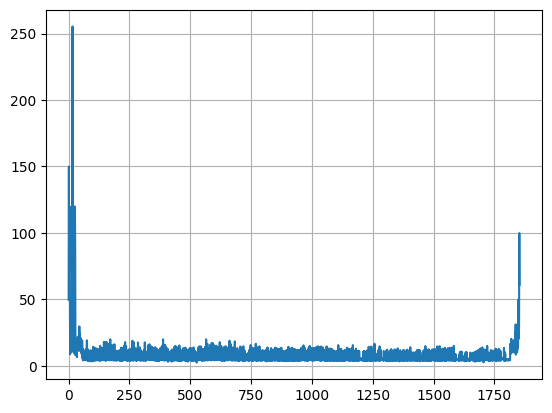

In [34]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(rhytm)

ax.grid()
plt.show()

In [35]:
sum(rhytm) / len(rhytm)

8.371623406331409

In [44]:
dist_total = 0
timediff_total_total = 0
timediff_total = 0

for idx in range(1, len(lat)):
    # Point0: lat[idx - 1], lon[idx - 1], time[idx - 1]
    # Point1: lat[idx], lon[idx], time[idx]
    dist = haversine.haversine((lat[idx - 1], lon[idx - 1]), (lat[idx], lon[idx]))
    timediff = time[idx] - time[idx - 1]

    dist_total_total += dist
    timediff_total_total += timediff.seconds
    dist_total += dist
    timediff_total += timediff.seconds

    if dist_total > 1:
        print(timedelta(seconds=timediff_total))
        dist_total = 0
        timediff_total = 0
print(timedelta(seconds=timediff_total / dist_total))

0:08:32
0:05:59
0:05:53
0:05:30
0:05:23
0:07:21.359831


In [45]:
print(timedelta(seconds=timediff_total_total / dist_total_total))

0:06:17.480321
